#IMPORTING LIBRARY & DATASETS


In [1]:
#Import Library


import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

Beberapa library yang akan kami gunakan untuk menyelesaikan tugas ini


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#EDA DATASETS

Kami menggunakan datsets oulad yang sebelumnya telah kami unggah pada drive. Dataset yang kami gunakan antara lain :
1. course.csv
2. assessments.csv
3. vle.csv
4. studentsInfo.csv
5. studentRegristaration.csv
6. studentAssessment.csv
7. studentInfo.csv

In [3]:
cour = "/content/gdrive/MyDrive/Colab2/Pra-UtsBigData/anonymisedData/courses.csv"
asse = "/content/gdrive/MyDrive/Colab2/Pra-UtsBigData/anonymisedData/assessments.csv"
vle = "/content/gdrive/MyDrive/Colab2/Pra-UtsBigData/anonymisedData/vle.csv"
stud = "/content/gdrive/MyDrive/Colab2/Pra-UtsBigData/anonymisedData/studentInfo.csv"
stur = "/content/gdrive/MyDrive/Colab2/Pra-UtsBigData/anonymisedData/studentRegistration.csv"
stua = "/content/gdrive/MyDrive/Colab2/Pra-UtsBigData/anonymisedData/studentAssessment.csv"
stuv = "/content/gdrive/MyDrive/Colab2/Pra-UtsBigData/anonymisedData/studentVle.csv"

In [4]:
df_cour = pd.read_csv(cour)
df_cour.head(100)

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240
5,BBB,2014B,234
6,CCC,2014J,269
7,CCC,2014B,241
8,DDD,2013J,261
9,DDD,2014J,262


In [5]:
df_cour.groupby(['code_module','code_presentation']).agg(['min','max'])

module_presentation_length     
                                                     min  max
code_module code_presentation                                
AAA         2013J                                    268  268
            2014J                                    269  269
BBB         2013B                                    240  240
            2013J                                    268  268
            2014B                                    234  234
            2014J                                    262  262
CCC         2014B                                    241  241
            2014J                                    269  269
DDD         2013B                                    240  240
            2013J                                    261  261
            2014B                                    241  241
            2014J                                    262  262
EEE         2013J                                    268  268
            2014B                                    241  241
            2014J                                    269  269
FFF         2013B                                    240  240
            2013J                                    268  268
            2014B                                    241  241
            2014J                                    269  269
GGG         2013J                                    261  261
            2014B                                    241  241
            2014J                                    269  269

Berdasarkan pemaparan di atas, terdapat 8 modul mata kuliah dari A (AAA) sampai G (GGG). Terdapat 2 semester, dengan kode Februari (B) dan Oktober (J). Beberapa modul mata kuliah memiliki lebih banyak pilihan tahun (2013-2014) dan semester.

In [6]:
df_asse = pd.read_csv(asse)
df_asse.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [7]:
df_asse.drop(['date','weight'],axis = 1).groupby(['code_module','assessment_type','code_presentation']).count()

id_assessment
code_module assessment_type code_presentation               
AAA         Exam            2013J                          1
                            2014J                          1
            TMA             2013J                          5
                            2014J                          5
BBB         CMA             2013B                          5
                            2013J                          5
                            2014B                          5
            Exam            2013B                          1
                            2013J                          1
                            2014B                          1
                            2014J                          1
            TMA             2013B                          6
                            2013J                          6
                            2014B                          6
                            2014J                          5
CCC         CMA             2014B                          4
                            2014J                          4
            Exam            2014B                          2
                            2014J                          2
            TMA             2014B                          4
                            2014J                          4
DDD         CMA             2013B                          7
            Exam            2013B                          1
                            2013J                          1
                            2014B                          1
                            2014J                          1
            TMA             2013B                          6
                            2013J                          6
                            2014B                          6
                            2014J                          6
EEE         Exam            2013J                          1
                            2014B                          1
                            2014J                          1
            TMA             2013J                          4
                            2014B                          4
                            2014J                          4
FFF         CMA             2013B                          7
                            2013J                          7
                            2014B                          7
                            2014J                          7
            Exam            2013B                          1
                            2013J                          1
                            2014B                          1
                            2014J                          1
            TMA             2013B                          5
                            2013J                          5
                            2014B                          5
                            2014J                          5
GGG         CMA             2013J                          6
                            2014B                          6
                            2014J                          6
            Exam            2013J                          1
                            2014B                          1
                            2014J                          1
            TMA             2013J                          3
                            2014B                          3
                            2014J                          3

Berdasarkan pemaparan dataset di atas,
1. Modul AAA hanya memiliki Exam dan TMA (Tutor Marked Assessment) pada semester bulan Oktober (J).
2. terdapat dua modul mata kuliah yang tidak memiliki attribut CMA (Computer Marked Assessment) yaitu modul AAA dan EEE. Bisa di artikan 2 modul mata kuliah tersebut merupakan mata kuliah umum yang tidak memerlukan tes komputer.



In [8]:
df_asse.drop(['id_assessment',],axis = 1).groupby(['code_module','assessment_type','code_presentation']).agg(['min','max'])

date        weight       
                                                 min    max    min    max
code_module assessment_type code_presentation                            
AAA         Exam            2013J                NaN    NaN  100.0  100.0
                            2014J                NaN    NaN  100.0  100.0
            TMA             2013J               19.0  215.0   10.0   30.0
                            2014J               19.0  215.0   10.0   30.0
BBB         CMA             2013B               54.0  187.0    1.0    1.0
                            2013J               54.0  208.0    1.0    1.0
                            2014B               47.0  194.0    1.0    1.0
            Exam            2013B                NaN    NaN  100.0  100.0
                            2013J                NaN    NaN  100.0  100.0
                            2014B                NaN    NaN  100.0  100.0
                            2014J                NaN    NaN  100.0  100.0
            TMA             2013B               19.0  187.0    5.0   18.0
                            2013J               19.0  208.0    5.0   18.0
                            2014B               12.0  194.0    5.0   18.0
                            2014J               19.0  201.0    0.0   35.0
CCC         CMA             2014B               18.0  207.0    2.0    8.0
                            2014J               18.0  214.0    2.0    8.0
            Exam            2014B                NaN    NaN  100.0  100.0
                            2014J                NaN    NaN  100.0  100.0
            TMA             2014B               32.0  200.0    9.0   22.0
                            2014J               32.0  207.0    9.0   22.0
DDD         CMA             2013B               23.0  206.0    2.0    6.0
            Exam            2013B              240.0  240.0  100.0  100.0
                            2013J              261.0  261.0  100.0  100.0
                            2014B              241.0  241.0  100.0  100.0
                            2014J                NaN    NaN  100.0  100.0
            TMA             2013B               25.0  200.0    7.5   15.0
                            2013J               25.0  207.0   10.0   20.0
                            2014B               25.0  200.0   10.0   20.0
                            2014J               20.0  195.0    5.0   25.0
EEE         Exam            2013J              235.0  235.0  100.0  100.0
                            2014B              228.0  228.0  100.0  100.0
                            2014J              235.0  235.0  100.0  100.0
            TMA             2013J               33.0  159.0   16.0   28.0
                            2014B               33.0  152.0   16.0   28.0
                            2014J               33.0  166.0   16.0   28.0
FFF         CMA             2013B              222.0  222.0    0.0    0.0
                            2013J              236.0  236.0    0.0    0.0
                            2014B              227.0  227.0    0.0    0.0
                            2014J              241.0  241.0    0.0    0.0
            Exam            2013B              222.0  222.0  100.0  100.0
                            2013J              236.0  236.0  100.0  100.0
                            2014B              227.0  227.0  100.0  100.0
                            2014J              241.0  241.0  100.0  100.0
            TMA             2013B               19.0  166.0   12.5   25.0
                            2013J               19.0  173.0   12.5   25.0
                            2014B               24.0  171.0   12.5   25.0
                            2014J               24.0  199.0   12.5   25.0
GGG         CMA             2013J              229.0  229.0    0.0    0.0
                            2014B              222.0  222.0    0.0    0.0
                            2014J              229.0  229.0    0.0    0.0
            Exam            2013J              229.0

Menurut dokumentasi data, ujian memiliki bobot 100, dan semua tugas lainnya memiliki bobot yang berjumlah 100. Namun, hal ini tidak berlaku untuk semua modul mata kuliah. Di modul GGG, hanya ujian yang berbobot. Selain itu, kursus GGG memiliki semua CMA pada tanggal yang sama. Mata kuliah GGG juga tidak normal dalam hal tanggal penugasan: semua mata kuliah lainnya mempunyai tugas pertama dalam 30 hari pertama, namun tugas pertama untuk mata kuliah GGG adalah pada hari ke 61. Tanggal ujian akhir tidak ada, namun ini dapat diambil dari kumpulan data courses.csv

In [9]:
df_vle = pd.read_csv(vle)
df_vle.head()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


In [10]:
sum(df_vle['week_from'].isnull())/df_vle.shape[0]*100


82.3852922690132

Dalam pemaparan di atas, diketahui pada attribute week_from dan week_to memiliki niali kosong atau tak bernilai.

In [11]:
df_stud = pd.read_csv(stud)
df_stud.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [12]:
df_stud.isnull().sum()

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

Terdapat 1111 pengamatan imd_band (Indeks Kerusakan Berganda, indeks kondisi kehidupan) hilang. Sesuatu yang mungkin ingin kami pertimbangkan saat membuat model nanti.

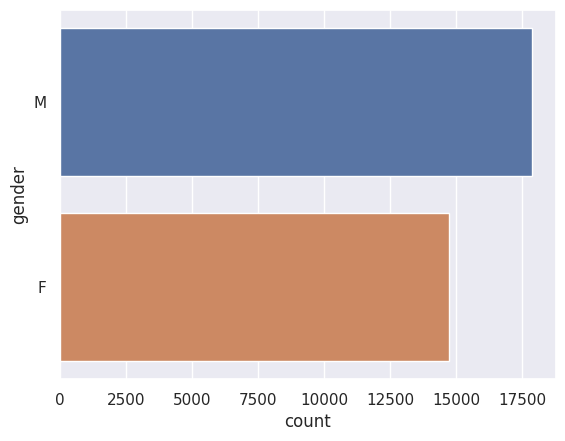

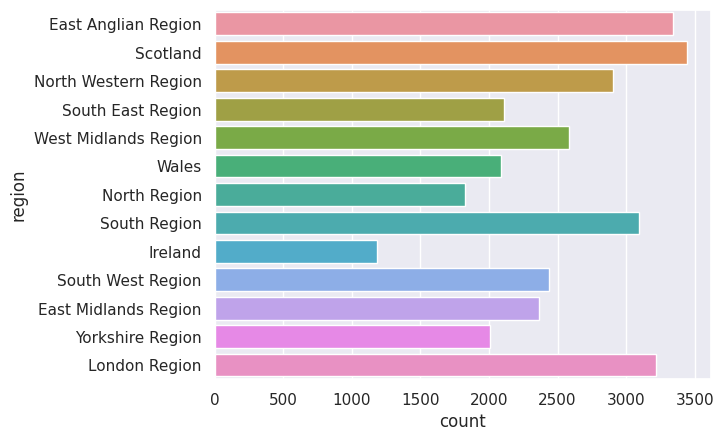

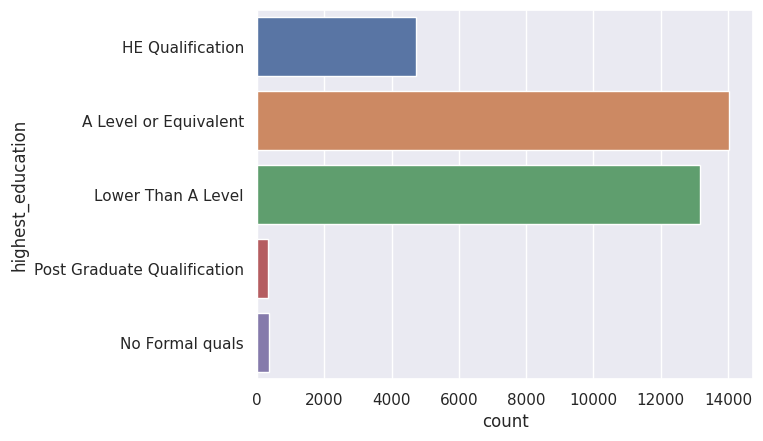

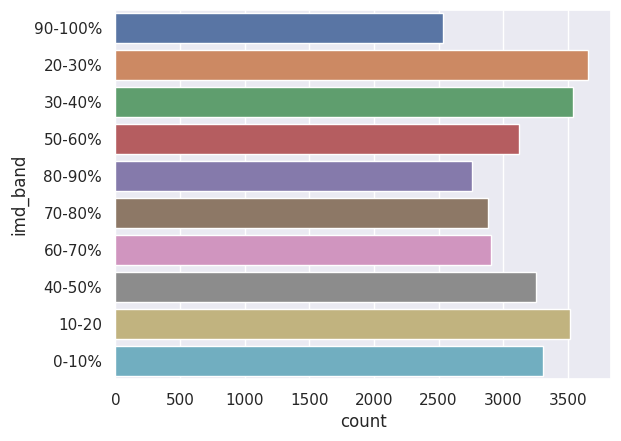

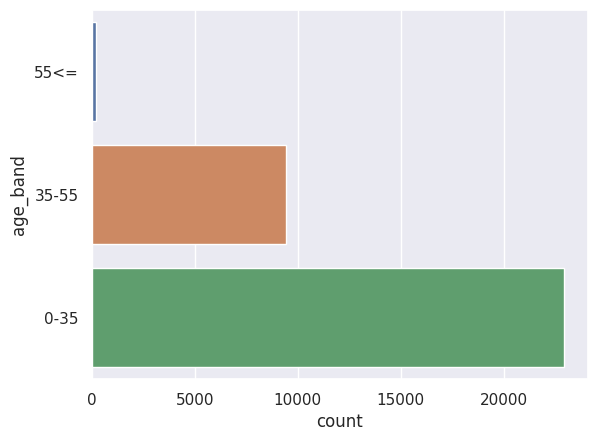

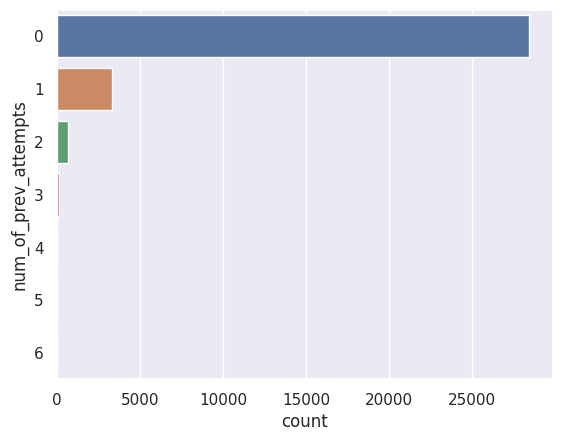

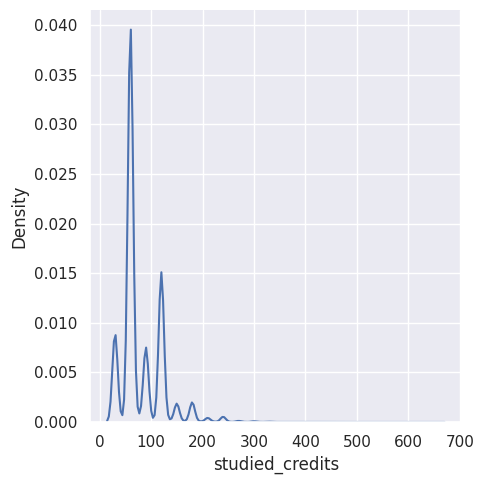

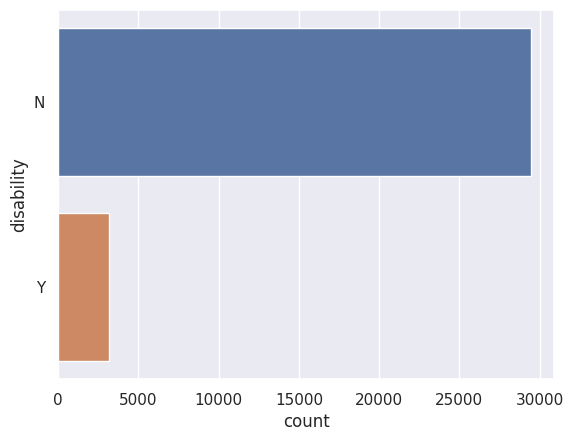

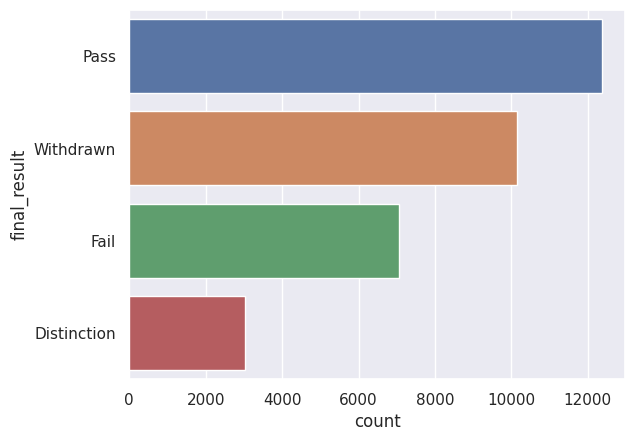

In [13]:
sns.set_theme(style="darkgrid")
for i, column in enumerate(df_stud.columns):
    if i>2 and i != 9:
        sns.countplot(y = column, data = df_stud)
        plt.show()
    elif i == 9:
        sns.displot(x = column, data = df_stud, kind="kde")
        plt.show()

Attribut seperti study_credits, num_of_prev_attempts, age_band, high_education berisi beberapa observasi ekstrim. Namun, ini tidak begitu masalah karena menggunakan Random Forest

In [14]:
df_stur = pd.read_csv(stur)
df_stur.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


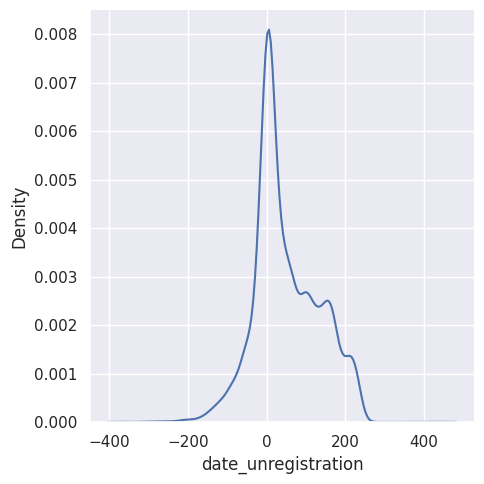

In [15]:
sns.displot(x = 'date_unregistration', data = df_stur, kind="kde")
plt.show()

Dari plot, kita dapat melihat bahwa ada cukup banyak siswa yang mengundurkan diri dari suatu modul sebelum modul mata kuliah dimulai. Kami akan menghapus siswa ini dari kumpulan data kami nanti, karena kami tidak memiliki data prestasi akademik mereka.

In [16]:
df_stua = pd.read_csv(stua)
df_stua.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


Berdasarkan data, skor berkisar antara 0 hingga 100. Skor yang lebih rendah dari 40 diartikan sebagai Gagal. Jika siswa tidak menyerahkan penilaian, tidak ada hasil yang dicatat. Sebagian besar nilai yang hilang berasal dari ujian akhir, sehingga tidak mempengaruhi analisis kami, karena kami hanya memperhatikan kinerja siswa di awal semester.

In [17]:
df_stua.isnull().sum()

id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64

#PREPPING DATA

In [18]:
def inner_merge(left_df,right_df,right_cols,on_cols):
    right_df = right_df[right_cols]
    left_df = left_df.merge(right_df, on = on_cols)
    return left_df.drop_duplicates()

Kami ingin memprediksi hasil akhir siswa berdasarkan kinerja awal mereka. Yang kami maksud dengan kinerja adalah 2 hal: kinerja akademik, diukur melalui skor siswa, dan keterlibatan akademik, diukur melalui berapa kali siswa mengklik konten modul. Tiga variabel di bawah mengontrol berapa hari dalam satu semester yang ingin kita sertakan untuk analisis.

In [19]:
score_deadline = 90
click_deadline = 90
withdraw_deadline = 90

Di bawah ini kami memiliki fungsi yang membuat kumpulan data yang berisi skor tugas rata-rata setiap siswa dalam hari batas waktu_skor pertama. Fungsi lainnya untuk membuat kumpulan data yang berisi jumlah rata-rata klik setiap siswa untuk setiap kategori sumber daya dalam hari batas waktu_klik pertama. Kemudian berfungsi untuk menggabungkan kedua dataset tersebut, serta menghapus siswa yang mengundurkan diri sebelum batas waktu penarikan. Karena analisis kami hanya berkaitan dengan Lulus/Gagal, kami menggabungkan hasil akhir Distinction menjadi Lulus, dan menggabungkan Ditarik menjadi Gagal. Idenya adalah bahwa setelah jangka waktu tertentu, satu-satunya orang yang mengundurkan diri adalah orang-orang yang peduli dengan kinerja mereka, dan kecil kemungkinannya untuk mengundurkan diri karena alasan non-akademik.

In [20]:
def create_score_df(score_deadline):
    score_df = inner_merge(df_asse,
                           df_stua,
                           df_stua.columns,
                           ['id_assessment'],
                          )

    score_df = score_df[score_df['date'] < score_deadline]

    score_df = score_df[score_df['assessment_type'] != 'Exam']

    score_df = score_df.dropna(subset = ['score'])

    score_df.isnull().sum()

    score_df['assessment_type'].value_counts()

    score_df = score_df.groupby(['code_module', 'code_presentation', 'id_student']).mean().reset_index()
    score_df = score_df.rename(columns = {'score': f'mean_score_day{score_deadline}'})
    score_df = score_df.drop(['date', 'weight',
                              'date_submitted', 'is_banked',
                              'id_assessment'],
                             axis = 1)
    return score_df

In [28]:
df_stuv = pd.read_csv(stuv)

In [29]:
# click data

def create_click_df(click_deadline):

    clicks = df_stuv

    clicks = inner_merge(clicks,
                         df_vle,
                         ['id_site','code_module','code_presentation','activity_type'],
                         ['id_site','code_module','code_presentation'],
                        )

    clicks = clicks.drop('id_site', axis = 1)

    def clicks_xx(clicks,xx):
        temp = clicks[clicks['date'] <= xx]
        temp = temp.drop('date', axis = 1)
        temp = temp.groupby(['code_module','code_presentation','id_student','activity_type']).mean()
        temp = temp.rename(columns = {'sum_click': f'sum_click{xx} mean'})
        temp = temp.reset_index() # this fills out the missing columns for merging later
        return temp

    click_data = pd.pivot_table(data = clicks_xx(clicks,click_deadline),
                                index = ['code_module','code_presentation','id_student'],
                                columns = 'activity_type',
                                values = [f'sum_click{click_deadline} mean'],
                                fill_value = 0,
                               ).reset_index()

    # get rid of multi index
    click_data = pd.concat([click_data['code_module'],
                            click_data['code_presentation'],
                            click_data['id_student'],
                            click_data[f'sum_click{click_deadline} mean']], axis=1)
    return click_data

In [26]:
# merge score_df and click_df
def create_final_df(withdraw_deadline, score_df, click_df):

    final_df = inner_merge(click_df, # merge with StudentInfo
                           df_stud,
                           df_stud.columns,
                           ['code_module', 'code_presentation', 'id_student'],
                          )

    final_df = final_df.replace('Distinction','Pass') # merge Pass and Distinction

    final_df = inner_merge(final_df,
                           df_stur,
                           ['code_module', 'code_presentation', 'id_student', 'date_unregistration'],
                           ['code_module', 'code_presentation', 'id_student'],
                          )

    final_df = final_df[(final_df['final_result'] != 'Withdrawn') | # remove people who withdrew before withdraw_deadline
                       (final_df['date_unregistration'] > withdraw_deadline)]

    final_df = final_df.reset_index()

    final_df = final_df.drop(['date_unregistration','index'],axis = 1)

    final_df = inner_merge(final_df,
                           score_df,
                           score_df.columns,
                           ['code_module', 'code_presentation', 'id_student'])

    final_df = final_df.replace('Withdrawn','Fail') # merge Withdrawn to Fail

    return final_df

In [30]:
score_df = create_score_df(score_deadline)
click_df = create_click_df(click_deadline)
final_df = create_final_df(withdraw_deadline, score_df, click_df)
final_df.head()

<ipython-input-20-d02bd8ce2615>:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  score_df = score_df.groupby(['code_module', 'code_presentation', 'id_student']).mean().reset_index()


,code_module,code_presentation,id_student,dataplus,dualpane,externalquiz,forumng,glossary,homepage,htmlactivity,...,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,mean_score_day90
0,AAA,2013J,11391,0.0,0.0,0.0,3.514286,0.0,3.478261,0.0,...,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,81.5
1,AAA,2013J,28400,0.0,0.0,0.0,2.988889,0.0,5.194444,0.0,...,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,69.0
2,AAA,2013J,31604,0.0,0.0,0.0,2.955882,1.0,4.340000,0.0,...,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,71.5
3,AAA,2013J,32885,0.0,0.0,0.0,3.127660,2.0,3.600000,0.0,...,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,49.5
4,AAA,2013J,38053,7.0,0.0,0.0,3.457364,0.0,4.438596,0.0,...,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,N,Pass,74.0


In [31]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23743 entries, 0 to 23742
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   code_module           23743 non-null  object 
 1   code_presentation     23743 non-null  object 
 2   id_student            23743 non-null  int64  
 3   dataplus              23743 non-null  float64
 4   dualpane              23743 non-null  float64
 5   externalquiz          23743 non-null  float64
 6   forumng               23743 non-null  float64
 7   glossary              23743 non-null  float64
 8   homepage              23743 non-null  float64
 9   htmlactivity          23743 non-null  float64
 10  oucollaborate         23743 non-null  float64
 11  oucontent             23743 non-null  float64
 12  ouelluminate          23743 non-null  float64
 13  ouwiki                23743 non-null  float64
 14  page                  23743 non-null  float64
 15  questionnaire      

In [32]:
pd.set_option('display.max_columns', None)
final_df.head()

,code_module,code_presentation,id_student,dataplus,dualpane,externalquiz,forumng,glossary,homepage,htmlactivity,oucollaborate,oucontent,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,mean_score_day90
0,AAA,2013J,11391,0.0,0.0,0.0,3.514286,0.0,3.478261,0.0,0.0,10.235294,0.0,0.0,0.0,0.0,0.0,0,1.285714,0.0,3.833333,1.000000,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,81.5
1,AAA,2013J,28400,0.0,0.0,0.0,2.988889,0.0,5.194444,0.0,0.0,5.636364,0.0,0.0,0.0,0.0,0.0,0,1.000000,0.0,2.333333,1.842105,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,69.0
2,AAA,2013J,31604,0.0,0.0,0.0,2.955882,1.0,4.340000,0.0,0.0,4.910256,0.0,0.0,0.0,0.0,0.0,0,1.666667,0.0,1.883721,1.600000,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,71.5
3,AAA,2013J,32885,0.0,0.0,0.0,3.127660,2.0,3.600000,0.0,0.0,5.303030,0.0,0.0,0.0,0.0,0.0,0,1.000000,0.0,1.736842,1.200000,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,49.5
4,AAA,2013J,38053,7.0,0.0,0.0,3.457364,0.0,4.438596,0.0,0.0,4.230769,0.0,0.0,0.0,0.0,0.0,0,1.500000,0.0,1.640000,1.416667,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,N,Pass,74.0


In [33]:
final_df.head().T

,0,1,2,3,4
code_module,AAA,AAA,AAA,AAA,AAA
code_presentation,2013J,2013J,2013J,2013J,2013J
id_student,11391,28400,31604,32885,38053
dataplus,0.0,0.0,0.0,0.0,7.0
dualpane,0.0,0.0,0.0,0.0,0.0
externalquiz,0.0,0.0,0.0,0.0,0.0
forumng,3.514286,2.988889,2.955882,3.12766,3.457364
glossary,0.0,0.0,1.0,2.0,0.0
homepage,3.478261,5.194444,4.34,3.6,4.438596
htmlactivity,0.0,0.0,0.0,0.0,0.0


Kami melakukan beberapa perbaikan pada kerangka data sebelum memasukkannya ke model kami. Pertama kami ingin mengkodekan semua variabel kategori. Di sini kami melakukan pengkodean label daripada pengkodean one-hot, hanya karena ini berfungsi untuk algoritma berbasis pohon, dan lebih mudah dibaca jika nanti kami ingin memeriksa setiap pohon secara visual.

In [34]:
def create_Xy(final_df):

    X = final_df.drop(['final_result','id_student','imd_band'],axis = 1)
    column_names = X.columns
    y = final_df['final_result']

    le = LabelEncoder()
    encode_dict = {}
    Xcat_features = ['code_module', 'code_presentation',
                    'gender', 'region',
                    'highest_education',
                    'age_band','disability',
                   ]

    for cat_feature in Xcat_features:
        X[cat_feature] = le.fit_transform(X[cat_feature])
        encode_dict[cat_feature] = le.classes_

    y = le.fit_transform(y)
    encode_dict['final_result'] = le.classes_

    X = X.to_numpy()

    return X,y,column_names,encode_dict

In [35]:
X,y,column_names,encode_dict = create_Xy(final_df)

In [36]:
corr = spearmanr(X).correlation
corr_linkage = hierarchy.ward(corr)
cluster_ids = hierarchy.fcluster(corr_linkage, 1, criterion='distance')
cluster_id_to_feature_ids = defaultdict(list)
for idx, cluster_id in enumerate(cluster_ids):
    cluster_id_to_feature_ids[cluster_id].append(idx)
selected_features = [v[0] for v in cluster_id_to_feature_ids.values()]

X = X[:, selected_features]
column_names = column_names[selected_features]

#MODELING

In [37]:
reg = RandomForestClassifier(n_estimators = 200,
                             max_features = 'sqrt',
                             min_samples_split = 10,
                            )

kf = KFold(n_splits=5, shuffle = True)

def train(X,y,reg,kf):
    if kf == False:
        reg.fit(X,y)
    else:
        for train_index, test_index in kf.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            reg.fit(X_train,y_train)
            print(f'evaluate score: {reg.score(X_test,y_test)}')

In [38]:
train(X,y,reg,kf)

evaluate score: 0.7504737839545167
evaluate score: 0.7372078332280481
evaluate score: 0.7532112023583912
evaluate score: 0.7523167649536647
evaluate score: 0.7377843302443134


In [39]:
days_list = [120,150,180,210]

for days in days_list:
    score_deadline = days
    click_deadline = days

    score_df = create_score_df(score_deadline)
    click_df = create_click_df(click_deadline)
    final_df = create_final_df(withdraw_deadline, score_df, click_df)

#     score_df.to_csv(f'score_df{days}.csv',index = False)
#     click_df.to_csv(f'click_df{days}.csv',index = False)
#     final_df.to_csv(f'final_df{days}.csv',index = False)

    X,y,column_names,encode_dict = create_Xy(final_df)

    print(f'Number of days in data: {days}')
    train(X,y,reg,kf)
    print('\n')

<ipython-input-20-d02bd8ce2615>:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  score_df = score_df.groupby(['code_module', 'code_presentation', 'id_student']).mean().reset_index()


Number of days in data: 120
evaluate score: 0.7580916351408155
evaluate score: 0.7587221521647751
evaluate score: 0.7614543926019336
evaluate score: 0.75010508617066
evaluate score: 0.7527853689299979




<ipython-input-20-d02bd8ce2615>:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  score_df = score_df.groupby(['code_module', 'code_presentation', 'id_student']).mean().reset_index()


Number of days in data: 150
evaluate score: 0.7719555648710962
evaluate score: 0.7633619786208342
evaluate score: 0.770278767553972
evaluate score: 0.7784531544749529
evaluate score: 0.7719077568134172




<ipython-input-20-d02bd8ce2615>:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  score_df = score_df.groupby(['code_module', 'code_presentation', 'id_student']).mean().reset_index()


Number of days in data: 180
evaluate score: 0.7912824811399832
evaluate score: 0.7954735959765298
evaluate score: 0.7816429170159263
evaluate score: 0.7942162615255658
evaluate score: 0.7917015926236379




<ipython-input-20-d02bd8ce2615>:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  score_df = score_df.groupby(['code_module', 'code_presentation', 'id_student']).mean().reset_index()


Number of days in data: 210
evaluate score: 0.8085061805992039
evaluate score: 0.8041064320134088
evaluate score: 0.7967735177037503
evaluate score: 0.80720871751886
evaluate score: 0.8049036043587594




Kami mengasumsikan lebih banyak data berarti akurasi yang lebih tinggi, namun hal ini juga berarti intervensi yang lebih lambat jika kita memutuskan untuk menjangkau siswa berdasarkan kinerja mereka. Titik terbaik untuk data kami tampaknya adalah 180 hari, yang berarti 60-80 hari sebelum ujian akhir. Ini mungkin waktu yang cukup untuk membantu siswa yang gagal, mengingat kursus disusun sedemikian rupa sehingga sebagian besar nilai bergantung pada ujian akhir.

In [40]:
# feature importance

from sklearn.inspection import permutation_importance

train(X,y,reg,kf = False)
importance = permutation_importance(reg, X, y, n_repeats=10, random_state = 0)
importance_mean = np.round(importance['importances_mean'],3)
importance_table = pd.DataFrame({'importance': importance_mean,
                                 'column': column_names,
                                })
importance_table.sort_values(by = 'importance', ascending = False)

,importance,column
29,0.186,mean_score_day210
16,0.086,quiz
11,0.071,oucontent
21,0.051,url
13,0.044,ouwiki
8,0.038,homepage
0,0.038,code_module
18,0.035,resource
6,0.035,forumng
24,0.028,highest_education


#SAMPLE

In [21]:
df = pd.merge(df_stud, df_stua, on='id_student')
df.head()
df_transposed = df.head().transpose()
df_transposed

,0,1,2,3,4
code_module,AAA,AAA,AAA,AAA,AAA
code_presentation,2013J,2013J,2013J,2013J,2013J
id_student,11391,11391,11391,11391,11391
gender,M,M,M,M,M
region,East Anglian Region,East Anglian Region,East Anglian Region,East Anglian Region,East Anglian Region
highest_education,HE Qualification,HE Qualification,HE Qualification,HE Qualification,HE Qualification
imd_band,90-100%,90-100%,90-100%,90-100%,90-100%
age_band,55<=,55<=,55<=,55<=,55<=
num_of_prev_attempts,0,0,0,0,0
studied_credits,240,240,240,240,240
